<a href="https://colab.research.google.com/github/Sushanttyagi2/NNP-assignment-1/blob/main/Sushant_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1

**Q:1 -** Explain the role of weights in a neuron.

**Answer -** Weights in a neuron determine the importance of each input.
Each input is multiplied by its corresponding weight before being summed.
Higher weight means the input has more influence on the output.
Weights are adjusted during training to minimize error.
Thus, weights help the neuron learn patterns and make accurate predictions.

**Q:2 -** What is an activation function?

**Answer -** An activation function is a mathematical function applied to the output of a neuron.
It determines whether the neuron should be activated (fire) or not.
It introduces non-linearity into the model, allowing neural networks to learn complex patterns.
Common activation functions include Sigmoid, ReLU, and Tanh.
Without activation functions, the network would behave like a simple linear model.

**Q:3 -** Define probability distribution in ML context.

**Answer -** A probability distribution in Machine Learning describes how the possible values of a random variable are distributed.
It assigns probabilities to different outcomes or events.
It helps models understand uncertainty and make predictions.
Examples include Normal distribution and Bernoulli distribution.
It is widely used in tasks like classification, regression, and Bayesian learning.

**Q:4 -** What is gradient in optimization?

**Answer -** The gradient in optimization is a vector of partial derivatives of a function.
It shows the direction of the steepest increase of the function.
In Machine Learning, it helps update model parameters to minimize loss.
Gradient descent uses the negative gradient to move toward minimum error.
Thus, the gradient guides the learning process efficiently.

**Q:5 -** Create a project using logistic regression with tensor?

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
attendance = tf.constant([30, 45, 55, 70, 80, 95], dtype=tf.float32)
result = tf.constant([0, 0, 0, 1, 1, 1], dtype=tf.float32)

In [ ]:
m_eager = tf.Variable(0.0)
b_eager = tf.Variable(0.0)

learning_rate = 0.001
epochs = 100

for i in range(epochs):
  with tf.GradientTape() as tape:

    logits = m_eager * attendance + b_eager
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=result, logits=logits))

  grads = tape.gradient(loss, [m_eager, b_eager])
  m_eager.assign_sub(learning_rate * grads[0])
  b_eager.assign_sub(learning_rate * grads[1])

  if i % 20 == 0:
    print(f"[Eager] Step {i} : Loss ={loss.numpy():.4f}")

[Eager] Step 0 : Loss =0.6931
[Eager] Step 20 : Loss =0.6500
[Eager] Step 40 : Loss =0.6496
[Eager] Step 60 : Loss =0.6492
[Eager] Step 80 : Loss =0.6489


In [ ]:
m_graph = tf.Variable(0.0)
b_graph = tf.Variable(0.0)

@tf.function
def train_step(x, y, m, b):
  with tf.GradientTape() as tape:
    logits = m * x + b
    y_pred = tf.nn.sigmoid(logits)
    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, y_pred))
  grads = tape.gradient(loss, [m, b])
  m.assign_sub(learning_rate * grads[0])
  b.assign_sub(learning_rate * grads[1])
  return loss

In [ ]:

for i in range(epochs):
  loss=train_step(attendance,result,m_graph,b_graph)
  if i%20==0:
    print(f"[Graph] Step {i} : Loss ={loss.numpy():.4f}")

[Graph] Step 0 : Loss =0.6931
[Graph] Step 20 : Loss =0.6500
[Graph] Step 40 : Loss =0.6496
[Graph] Step 60 : Loss =0.6492
[Graph] Step 80 : Loss =0.6489


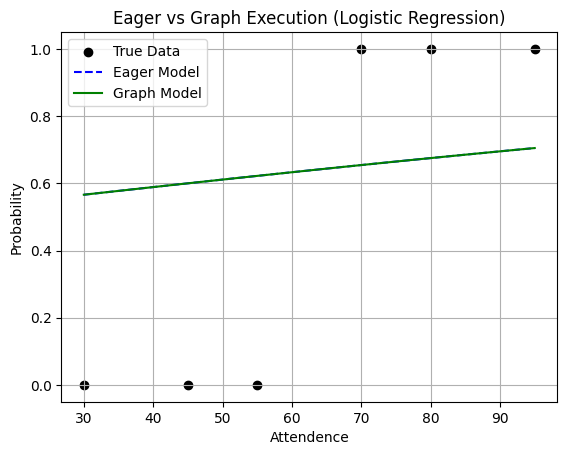

In [ ]:
attendance_range = np.linspace(float(tf.reduce_min(attendance)), float(tf.reduce_max(attendance)), 100)

plt.scatter(attendance, result, label="True Data", color='black')

plt.plot(attendance_range, tf.nn.sigmoid(m_eager * attendance_range + b_eager), label="Eager Model", color="blue", linestyle="--")
plt.plot(attendance_range, tf.nn.sigmoid(m_graph * attendance_range + b_graph), label="Graph Model", color="green")

plt.xlabel("Attendence")
plt.ylabel("Probability")
plt.title("Eager vs Graph Execution (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()